   sepallength  sepalwidth  petallength  petalwidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
    sepallength  sepalwidth  petallength  petalwidth        class
15          5.7         4.4          1.5         0.4  Iris-setosa
   sepallength  sepalwidth  petallength  petalwidth        class
0     0.222222    0.625000     0.067797    0.041667  Iris-setosa
1     0.166667    0.416667     0.067797    0.041667  Iris-setosa
2     0.111111    0.500000     0.050847    0.041667  Iris-setosa
3     0.083333    0.458333     0.084746    0.041667  Iris-setosa
4     0.194444    0.666667     0.067797    0.041667  Iris-setosa


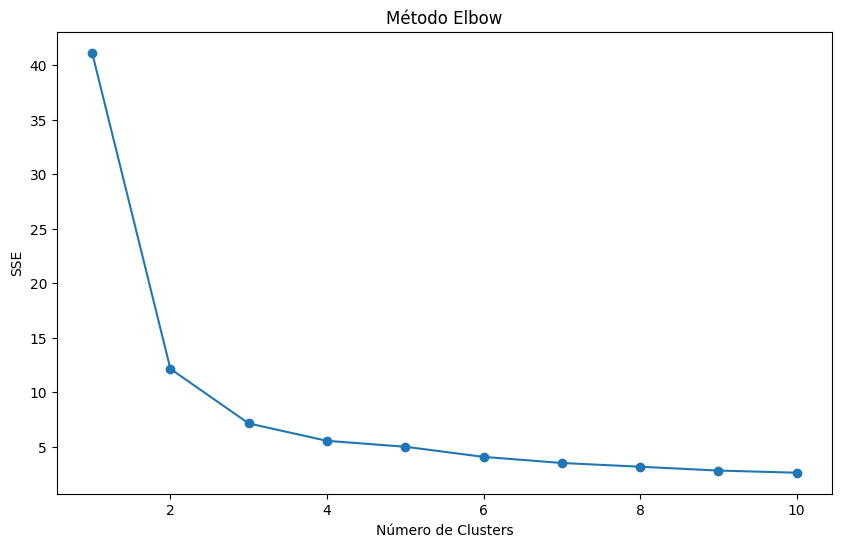

Pontuação Silhouette: 0.48247222154221125
         sepallength  sepalwidth  petallength  petalwidth
cluster                                                  
0           0.667735    0.443109     0.757171    0.782051
1           0.196111    0.590833     0.078644    0.060000
2           0.412037    0.276910     0.558969    0.520833


ValueError: could not convert string to float: 'Iris-setosa'

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# Carregar os dados
dados = pd.read_csv(r'C:\Users\larin\Desktop\PUC\IA\Listas\Lista 08\Resolução\Iris.csv')

# Exibir as primeiras linhas do dataframe
print(dados.head())

# Calcular o Z-score para cada coluna (exceto a coluna 'class')
z_scores = dados.iloc[:, :-1].apply(zscore)

# Identificar outliers (Z-score maior que 3 ou menor que -3)
outliers = (z_scores.abs() > 3).any(axis=1)
dados_outliers = dados[outliers]

# Exibir os outliers
print(dados_outliers)

# Normalizar os dados (exceto a coluna 'class')
scaler = MinMaxScaler()
dados_normalized = pd.DataFrame(scaler.fit_transform(dados.iloc[:, :-1]), columns=dados.columns[:-1])
dados_normalized['class'] = dados['class']

# Exibir as primeiras linhas do dataframe normalizado
print(dados_normalized.head())

# Encontrar o número ideal de clusters usando o método Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalized.iloc[:, :-1])
    sse.append(kmeans.inertia_)

# Plotar o gráfico Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método Elbow')
plt.show()

# Aplicar K-means com o número de clusters escolhido (por exemplo, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dados_normalized.iloc[:, :-1])

# Calcular a pontuação Silhouette
silhouette_avg = silhouette_score(dados_normalized.iloc[:, :-1], clusters)
print(f'Pontuação Silhouette: {silhouette_avg}')

dados_normalized['cluster'] = clusters

# Adicionar a coluna com as classes verdadeiras
dados_normalized['true_class'] = dados['class']

# Exibir a média de cada cluster para cada característica (exceto as colunas 'class' e 'true_class')
cluster_means = dados_normalized.drop(columns=['class', 'true_class']).groupby('cluster').mean()
print(cluster_means)

# Calcular o índice Davies-Bouldin usando apenas colunas numéricas
db_score = davies_bouldin_score(dados_normalized.drop(columns=['class', 'true_class', 'cluster']), clusters)
print(f'Índice Davies-Bouldin: {db_score}')

# Visualização usando um par de características
sns.scatterplot(data=dados_normalized, x='sepallength', y='sepalwidth', hue='cluster', style='true_class', palette='deep')
plt.title('Clusters vs Classes Verdadeiras')
plt.show()
